In [8]:
import shutil
import glob
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
from IPython.display import Image
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
mobile = mobilenet.MobileNet()

17227776/17225924 [==============================] - 12s 1us/step


In [5]:
if os.path.isfile('./model/mobile_model.h5') is False:
    mobile.save('./model/mobile_model.h5')

In [7]:
def prepare_image(file):
    img_path = './picture/'
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return mobilenet.preprocess_input(img_array_expanded_dims)

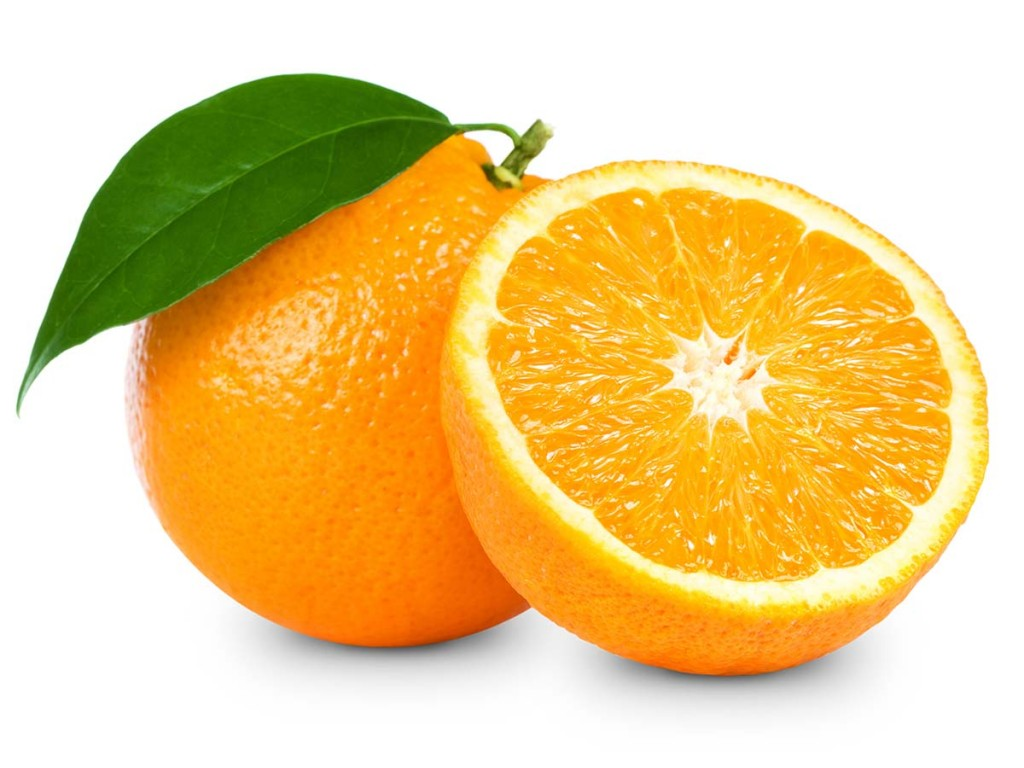

In [24]:
Image(filename='./picture/orange.jpg',width=1200, height=600)

In [25]:
preprocessed_img = prepare_image('orange.jpg')
predictions = mobile.predict(preprocessed_img)
result = imagenet_utils.decode_predictions(predictions)
result

[[('n07747607', 'orange', 0.8460591),
  ('n07749582', 'lemon', 0.15393516),
  ('n07768694', 'pomegranate', 1.386754e-06),
  ('n07717556', 'butternut_squash', 1.0467908e-06),
  ('n07753275', 'pineapple', 9.911392e-07)]]